# Data Cleaning

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos el archivo con los datos, que se encuetra en Google Drive

url='https://drive.google.com/file/d/1lqdL5E3pjC0ISjsEe_F1N8xIKK8y-0nz/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

data = pd.read_csv(dwn_url)
data.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [3]:
print(f'La base de datos original contiene {data.shape[0]} filas, que son albumes, y {data.shape[1]} columnas, que son los atributos')

La base de datos original contiene 160000 filas, que son albumes, y 45 columnas, que son los atributos


In [4]:
#Primeras manipulaciones

'''Seteo de ID como index'''
data = data.set_index('id')

'''Verificamos si tenemos datos duplicados'''
duplicados = data.duplicated().sum()/data.shape[0]
print(f'De todos los registros el {round(duplicados*100,1)}% son duplicados')



De todos los registros el 54.8% son duplicados


In [5]:
'''Eliminamos registros duplicados'''
dataUnique = data.drop_duplicates()
print(f'La base de datos contiene {dataUnique.shape[0]} filas, que son albumes Unicos, y {dataUnique.shape[1]} columnas, que son los atributos')

La base de datos contiene 72357 filas, que son albumes Unicos, y 44 columnas, que son los atributos


In [6]:
#Verificacion de cantidad de canciones
oneTrack = dataUnique.loc[dataUnique['total_tracks'] == 1]['name'].count()
twoTracks = dataUnique.loc[dataUnique['total_tracks'] == 2]['name'].count()

print(f'Los registros con total_tracks =  1 son {oneTrack} y con total_tracks = 2 son {twoTracks}. Los restantes {dataUnique.shape[0]-oneTrack-twoTracks} registros tienen 3 o mas canciones')

Los registros con total_tracks =  1 son 30032 y con total_tracks = 2 son 2391. Los restantes 39934 registros tienen 3 o mas canciones


In [7]:
dataUnique.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,72357,66433,Greatest Hits,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,72357,7574,2021-09-03,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artists,72357,46374,"Various Artists,",1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_tracks,72357.0,NaN,NaN,NaN,8.138356,15.39179,1.0,1.0,5.0,12.0,1190.0
t_name0,72357,62610,Intro,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name1,42325,38406,Blue Moon,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name2,39934,36436,Time,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_dur0,72357.0,NaN,NaN,NaN,205603.853753,140451.775697,1485.0,151030.0,192647.0,236493.0,10828190.0
t_dur1,42325.0,NaN,NaN,NaN,223525.931837,145620.551997,4120.0,166306.0,207760.0,254492.0,7054236.0
t_dur2,39934.0,NaN,NaN,NaN,222122.601793,125090.334057,4285.0,165920.0,208415.5,256000.0,6145123.0


### Descripcion de los Atributos

A continuacion se listan y describen las columnas del data set

- **ID**: Variable de identificación de cada registro
- **Name**: Nombre del álbum
- **Release Date**: Fecha en que se presento el álbum
- **Artists**: Artistas del álbum
- **Total Tracks**: Numero total de canciones en el álbum
- **Name**: Nombre de la canción 
- **Duration**: Duracion de la canción en ms (milisegundos)
- **Danceability**: Atributo que describe que tan bailable es la canción. Su valor esta en el rango de [0,1], donde ‘0’ es menos bailable y ‘1’ es lo mas bailable.
- **Energy**: Atributo que describe la intensidad de la canción. Su valor esta en el rango de [0,1], siendo ‘1’ el valor para canciones mas energéticas
- **Key**: Tonalidad en que esta escrita la canción. Esta variable es un entero entre [0,11], donde la tonalidad C=0, C#=1 y asi hasta B=11.
- **Mode**: Atributo que indica la Modalidad de la canción. Toma valor “0” si la modalidad es Menor y “1” si la modalidad es Mayor
- **Speechiness**: Atributo que detecta la presencia de discursos dentro de una canción. Su valor esta en el rango de [0,1]. Cuanto mas exclusivamente hablada sea la canción, mas cercano a 1 sera el valor de este atributo. 
- **Acousticness**: Atributo que detecta si una canción es acústica. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones acústicas
- **Instrumentalness**: Atributo que detecta la ausencia de voz en la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones completamente instrumentales. 
- **Liveness**: Atributo que detecta la presencia de una audiencia en la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones en vivo. 
- **Valence**: Atributo que busca describir la positividad musical de la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones mas “positivas”.
- **Tempo**: Tempo estimado de la canción en pulsaciones por minuto (beats per minute BPM).
- **Time Signature**: Marca de tiempo de la canción (es la forma de especificar cuantas pulsaciones hay en un compas). 
- **Popularity**: VARIABLE TARGET. Valor de popularidad del Album. Su valor esta en el rango de [1,100]



Los atributos descriptivos de canciones del album (Name, Duration, Danceability, Energy, Key, Mode, Speechiness, Acousticness, Intrumentalness, Liveness, Valence, Tempo y Time Signature) aparecen como 3 columnas en cada caso. Esto es porque se describen estos atributos para 3 canciones por registro. En caso que el registro sea un single, no se tendran datos para los atributos de las canciones 2 y 3. 

In [8]:
#Podemos ver esto mirando la cantidad de NaN

dataUnique.isnull().sum()

name                0
release_date        0
artists             0
total_tracks        0
t_name0             0
t_name1         30032
t_name2         32423
t_dur0              0
t_dur1          30032
t_dur2          32423
t_dance0           80
t_dance1        30090
t_dance2        32466
t_energy0          80
t_energy1       30090
t_energy2       32466
t_key0             80
t_key1          30090
t_key2          32466
t_mode0            80
t_mode1         30090
t_mode2         32466
t_speech0          80
t_speech1       30090
t_speech2       32466
t_acous0           80
t_acous1        30090
t_acous2        32466
t_ins0             80
t_ins1          30090
t_ins2          32466
t_live0            80
t_live1         30090
t_live2         32466
t_val0             80
t_val1          30090
t_val2          32466
t_tempo0           80
t_tempo1        30090
t_tempo2        32466
t_sig0             80
t_sig1          30090
t_sig2          32466
popularity          0
dtype: int64

Viendo el resultado, se puede ver como la cantidad de nulos aumenta muchisimo al ir de la primer columna del atributo a la segunda y a la tercera.

Ejemplo: dance_0 tiene 80 registros nulos, mientras que dance_1 tiene 30090 y dance_2 tiene 32466

### Reduccion de Features

Para poder bajar la cantidad de atributos, se podrian discutir dos opciones:

1- Dejar solo la primer cancion de cada registro, asi cada album estaria representado por la primer cancion o la unica presente en los casos de singles

2- Realizar un promedio de cada variable entre los valores de las canciones presentes.

Las variables a las que le aplicariamos la reduccion son las descriptivas de las canciones:

- **Duration** 
- **Danceability**
- **Energy**
- **Speechiness**
- **Acousticness**
- **Instrumentalness**
- **Liveness**
- **Valence**
- **Tempo**
- **Time Signature**

Hay 2 variables descriptivas mas que son **Key** y **Mode**. Pero estas variables, si bien toman valores numericos, son categoricas (su valor es entero porque referencia a una categoria). Lo mismo sucede con la variable **Name**. 

Se crea una funcion que reduce la cantidad de features descriptivos. Como se ve en la data, los registros con 3 o mas canciones poseen 3 columnas por feature descriptivo (ejemplo, danceability aparecera como dance_0, dance_1 y dance_2). Para reducir esto a solo una columna por Feature, se toma el **promedio** de los valores de cada columna.
En el caso especial de las variables *Name*, *Key* y *Mode*, se toma el valor de la primer cancion. 

In [9]:
def reduccionFeatures(df):
    
    '''Esta funcion toma el Data Frame de spotify y reduce los features descriptivos tomando el promeido por cancion'''
    
    '''De los atributos descriptivos de las canciones, Key y Mode no se pueden promediar por su significado
    Por lo tanto tomamos los valores de la primer cancion para estos dos atributos, sin importar cuantas canciones
    hay en el album'''

    '''Lo mismo se hace con la variable Name, se deja solamente t_name0'''

    
    dfDrop = df.drop(['t_key0','t_key1','t_key2','t_mode0','t_mode1','t_mode2'],axis = 1)   

    
    col =  dfDrop.columns    #Lista de las columnas del DF
    
    columns = []
    
    for c in range(7,len(col),3):    #Generamos un vector con los nombres de las variables descriptivas
        columns.append(col[c])
    
    
    '''Promediamos el resto de las variables descriptivas'''
    
    Info = np.zeros(11)  #Vector vacio para ir pegando la informacion. Las features una vez reducidas son 12 + popularidad
    #print(Info)
    
    for i in df.index:
        reg = []
        
        '''Si el registro solo contiene una cancion'''
        
        if df['total_tracks'][i] == 1:
            
            for j in range(7,len(col),3):
                reg.append(dfDrop[col[j]][i])
                
        elif df['total_tracks'][i] == 2:
            
            for j in range(7,len(col)-1,3):
                prom = round((dfDrop[col[j]][i]+dfDrop[col[j+1]][i])/2,3)
                reg.append(prom) 
                
            popularity = dfDrop[col[j+3]][i]               #La popularidad es un dato unico por album (o sea por registro)
            reg.append(popularity)
        else:
            
            for j in range(7,len(col)-1,3):
                prom = round((dfDrop[col[j]][i]+dfDrop[col[j+1]][i]+dfDrop[col[j+2]][i])/3,3)
                reg.append(prom)  
                
            popularity = dfDrop[col[j+3]][i]              #La popularidad es un dato unico por album (o sea por registro)
            reg.append(popularity)
        #print(reg)
        Info = np.vstack((Info, reg))
          
    Info = np.delete(Info,0,0)
    dataInicial = df[['name','release_date','artists','total_tracks','t_name0','t_key0','t_mode0']]
    dataInfo = pd.DataFrame(index = df.index,columns = columns, data = Info)
    data = pd.concat([dataInicial,dataInfo],axis = 1)
    
    return data

In [10]:
import time

#Verificamos el tiempo que lleva correr la funcion anterior en el DataSet

inicio =time.process_time()

dfReducido = reduccionFeatures(dataUnique)

fin = time.process_time()

print(f'El codigo tardo {fin-inicio} segundos')

El codigo tardo 66.515625 segundos


In [11]:
dfReducido.shape

(72357, 18)

In [12]:
#Verificamos si existen nulos
dfReducido.isnull().sum()

name              0
release_date      0
artists           0
total_tracks      0
t_name0           0
t_key0           80
t_mode0          80
t_dur0            0
t_dance0        130
t_energy0       130
t_speech0       130
t_acous0        130
t_ins0          130
t_live0         130
t_val0          130
t_tempo0        130
t_sig0          130
popularity        0
dtype: int64

**Observacionces de Limpieza**

Vemos que de los 72357 registros unicos, exiten datos nulos en los features descriptivos en 130 casos, lo cual representa un 0.13%.

Se realiza un llenado de datos nulos con la media del atributo en cada caso

In [13]:
def fill_na(dfref,df,atributos):
    for i in atributos:
        moda = dfref[i].mode()[0]
        df[i].fillna(moda,inplace=True)
    
    

In [14]:
atributos = ['t_key0','t_mode0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','t_sig0']

fill_na(dfReducido,dfReducido,atributos)

In [15]:
dfReducido.isnull().sum()

name            0
release_date    0
artists         0
total_tracks    0
t_name0         0
t_key0          0
t_mode0         0
t_dur0          0
t_dance0        0
t_energy0       0
t_speech0       0
t_acous0        0
t_ins0          0
t_live0         0
t_val0          0
t_tempo0        0
t_sig0          0
popularity      0
dtype: int64

In [16]:
#Guardamos el data set obtenido, ya que es el data set limpio

#Correr esta celda solo si no se tiene el archivo guardado previamente

dfReducido.to_csv('data_clean.csv')

## Pipeline para datos futuros

1) Setear columna ID como index

2) Eliminar registros duplicados

3) Correr funcion ReduccionFeatures (para reducir la cantidad de features)

4) Correr funcion de llenado de valores NaN

## Clase Popularidad - Para Clasificacion

Podemos transformar la variable Target **Popularity** en clases, para asi poder utilizar algoritmos de clasificacion para su prediccion.

Lo que se haces es separar los valores de la variable en grupos. Dado que la variable Popularity toma valores del 0-100, dividimos ese rango en, por ejemplo, 5 clases:

- Clase 1 - Popularidad baja: Valores del 1 al 20
- Clase 2 - Popularidad mediabaja: Valores del 21 al 40
- Clase 3 - Popularidad media: Valores del 41 al 60
- Clase 4 - Popularidad mediaalta: Valores del 61 al 80 
- Clase 5 - Popularidad alta: Valores del 81 al 100



In [17]:
def clasePopularidad(x,inf,sup,divisiones):
    step = math.ceil((sup-inf)/divisiones)
    incremento = step
    clase = 1
    while x> step:
        step = step + incremento
        clase = clase +1
    return clase
        
    

In [18]:
dfReducido['ClasePopularidad'] = dfReducido['popularity'].apply(lambda x: clasePopularidad(x,1,100,5))
dfReducido['ClasePopularidad']

id
0         3
1         4
2         5
3         3
4         4
         ..
159978    2
159980    2
159984    1
159991    2
159999    2
Name: ClasePopularidad, Length: 72357, dtype: int64

In [19]:
dfReducido.head()

,name,release_date,artists,total_tracks,t_name0,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,,,,,,
0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,7.0,1.0,192284.000,0.537,0.459,0.049,0.490,0.000,0.091,0.779,133.243,3.333,51.0,3
1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,10.0,0.0,195199.667,0.779,0.658,0.202,0.109,0.000,0.114,0.413,139.028,4.000,67.0,4
2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,8.0,0.0,154768.333,0.555,0.487,0.273,0.241,0.029,0.287,0.521,122.269,4.000,81.0,5
3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,8.0,1.0,203866.333,0.628,0.585,0.027,0.333,0.000,0.203,0.556,114.783,4.000,53.0,3
4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,9.0,1.0,140693.000,0.638,0.302,0.072,0.711,0.000,0.271,0.533,116.460,4.000,70.0,4


In [20]:
#Guardamos el data set obtenido, que nos servira para realizar el fit de los algoritmos

#Correr esta celda solo si no se tiene el archivo guardado previamente

dfReducido.to_csv('data_cleanAlgoritmo.csv')

## Visualizacion de Atributos a usarse en Algoritmos

Los Features considerados para los algoritmos son:

- **Key**
- **Mode**
- **Duration**
- **Danceability**
- **Energy**
- **Speechiness**
- **Acousticness**
- **Instrumentalness**
- **Liveness**
- **Valence**
- **Tempo**
- **Time Signature**

In [21]:
from scipy import stats
from scipy.stats import norm

def histogramas_features(features,df):

  height = []
  for j in range(0,math.ceil(len(features)/2),2):
    height.append(2)
    height.append(1)

  fig,axes = plt.subplots((math.ceil(len(features)/4)*2),4,figsize=(25,22),gridspec_kw={'height_ratios': height})   #El numero de filas va x2 porque cada feature lleva dos graficos
  A = [0,0,0,0,2,2,2,2,4,4,4,4]
  B = [0,1,2,3,0,1,2,3,0,1,2,3]
  C = [1,1,1,1,3,3,3,3,5,5,5,5]

  for i,a,b in zip(range(0,len(features)),A,B):
    sns.distplot(df.loc[:,features[i]],hist=True,kde=True,ax=axes[a,b],fit =norm)    #Hago los histogramas
    axes[a,b].legend(labels = ['Actual','Fit de Normal'])

  for i,c,b in zip(range(0,len(features)),C,B):
    sns.boxplot(x = features[i], data = df, orient = 'v', color = '#99edc3', ax = axes[c,b])
                                     
        


C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

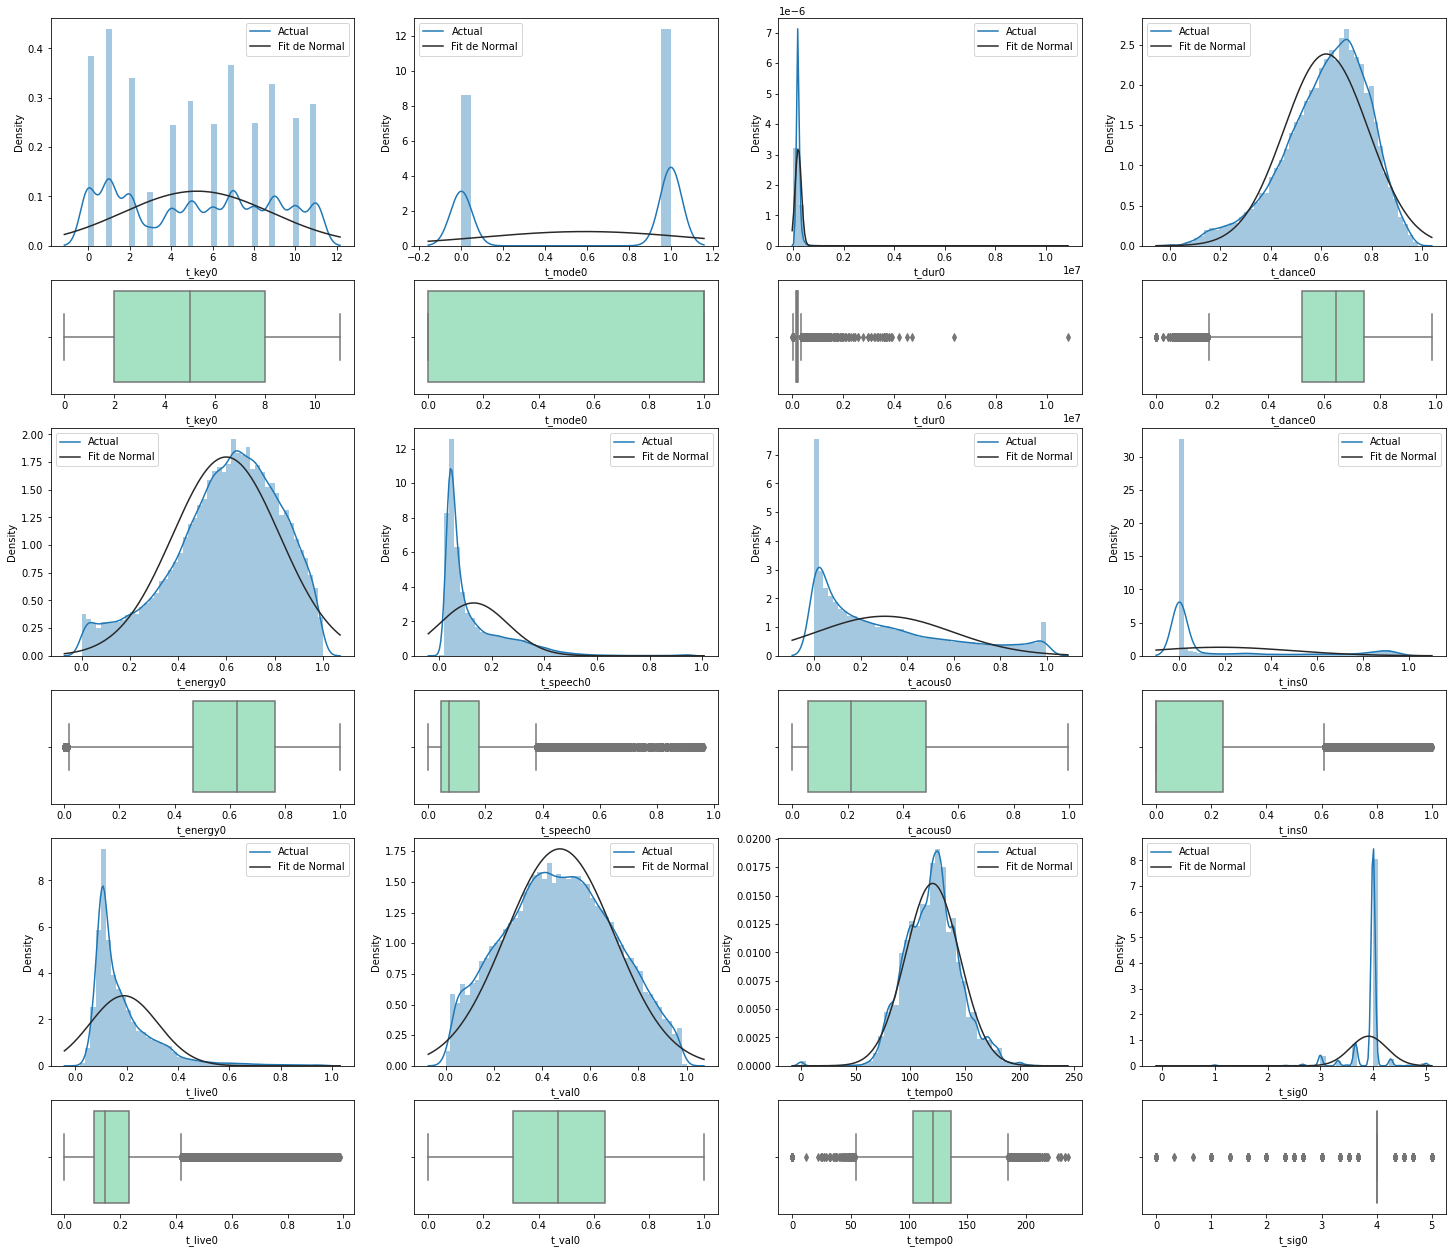

In [22]:
features = ['t_key0','t_mode0','t_dur0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','t_sig0']
histogramas_features(features,dfReducido)